In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from tqdm import tqdm

from src.visualization import plot_result
from src.algorithms import LocalSearchTSP, IteratedLocalSearch, LargeScaleNeighbourSearch

In [3]:
def pretty_print(algorithm, values):
    min_time, max_time, avg_time, minv, maxv, avgv, min_iters, max_iters, avg_iters = values
    print(f'Algorithm: {algorithm}:')
    print(f'    objective: {avgv}({int(minv)} - {int(maxv)})')
    print(f'    times: {avg_time}({min_time} - {max_time})')
    print(f'    iterations: {avg_iters}({min_iters} - {max_iters})')
    print('========================================================')

In [4]:
def experiments(node_path, max_time):
    seed = 841
    nodes_instance = np.genfromtxt(node_path, dtype=int, delimiter=';')

    algorithms_ils = {
        'ils_steepest': IteratedLocalSearch(node_path, LocalSearchTSP('steepest', node_path, 'edges', 'random'), max_time=max_time),
        'large_scale_neighbourhood_no_ls': LargeScaleNeighbourSearch(node_path, LocalSearchTSP('steepest', node_path, 'edges', 'random'), max_time=max_time, use_ls=False),
        'large_scale_neighbourhood_ls': LargeScaleNeighbourSearch(node_path, LocalSearchTSP('steepest', node_path, 'edges', 'random'), max_time=max_time, use_ls=True),
    }

    results= {}
    for key, algorithm in tqdm(algorithms_ils.items(), bar_format='{l_bar}{bar}'):
        result = algorithm.run_experiment(seed=seed)
        results[key] = result

    for key, result in results.items():
        values = result[:-2]
        pretty_print(key, values)

    for key, result in results.items():
        minv, path = result[3], result[-2]
        plot_result(nodes_instance, path, minv)
        print('===============================================================')

# Instance C

100%|██████████

Algorithm: ils_steepest:
    objective: 47097.6(46788 - 47402)
    times: 530.4385712385177(530.4385645389557 - 530.4385795593262)
    iterations: 2156.2(2117 - 2211)
Algorithm: large_scale_neighbourhood_no_ls:
    objective: 49054.2(47812 - 50473)
    times: 530.4385667324066(530.4385559558868 - 530.4385793209076)
    iterations: 247538.9(246574 - 248330)
Algorithm: large_scale_neighbourhood_ls:
    objective: 47224.4(46818 - 47525)
    times: 530.4385731935502(530.4385590553284 - 530.438583612442)
    iterations: 2460.9(2360 - 2624)


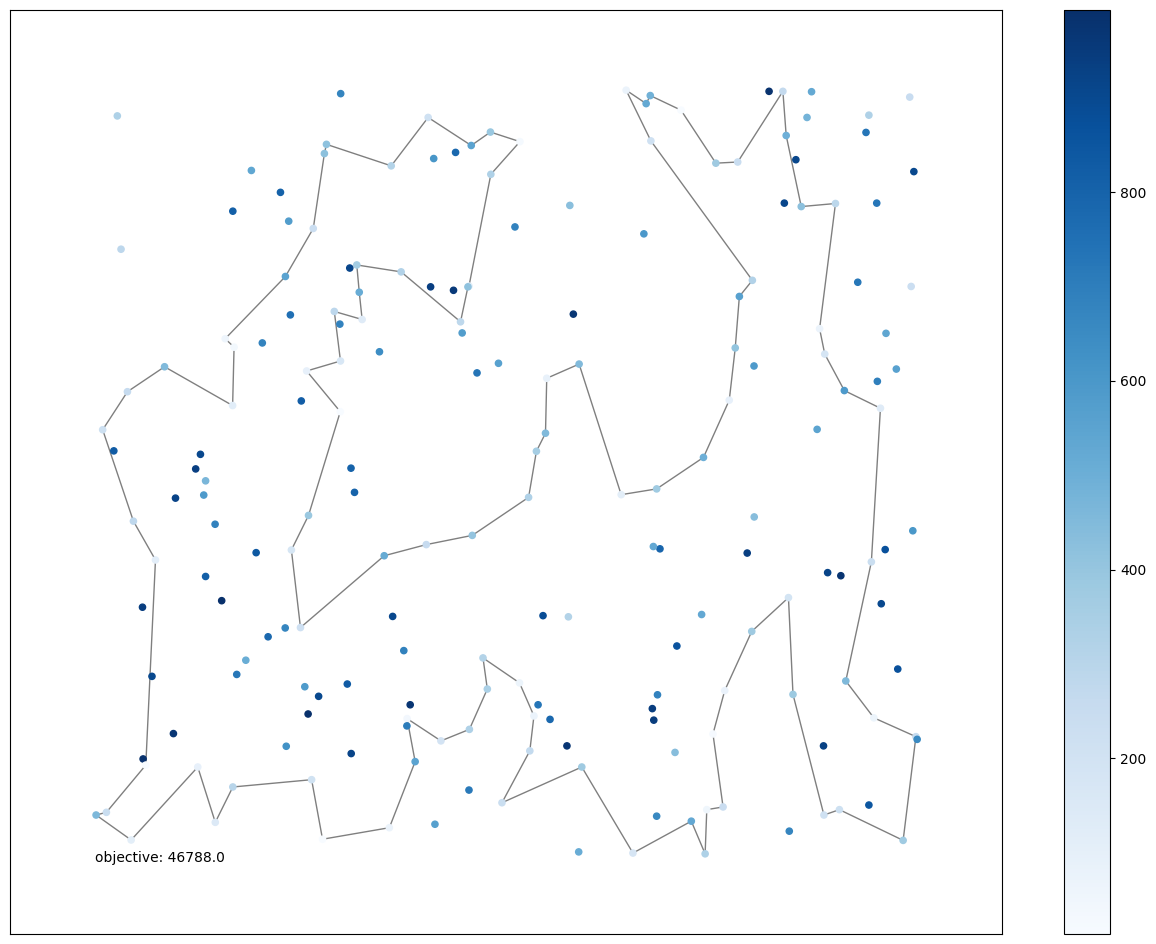

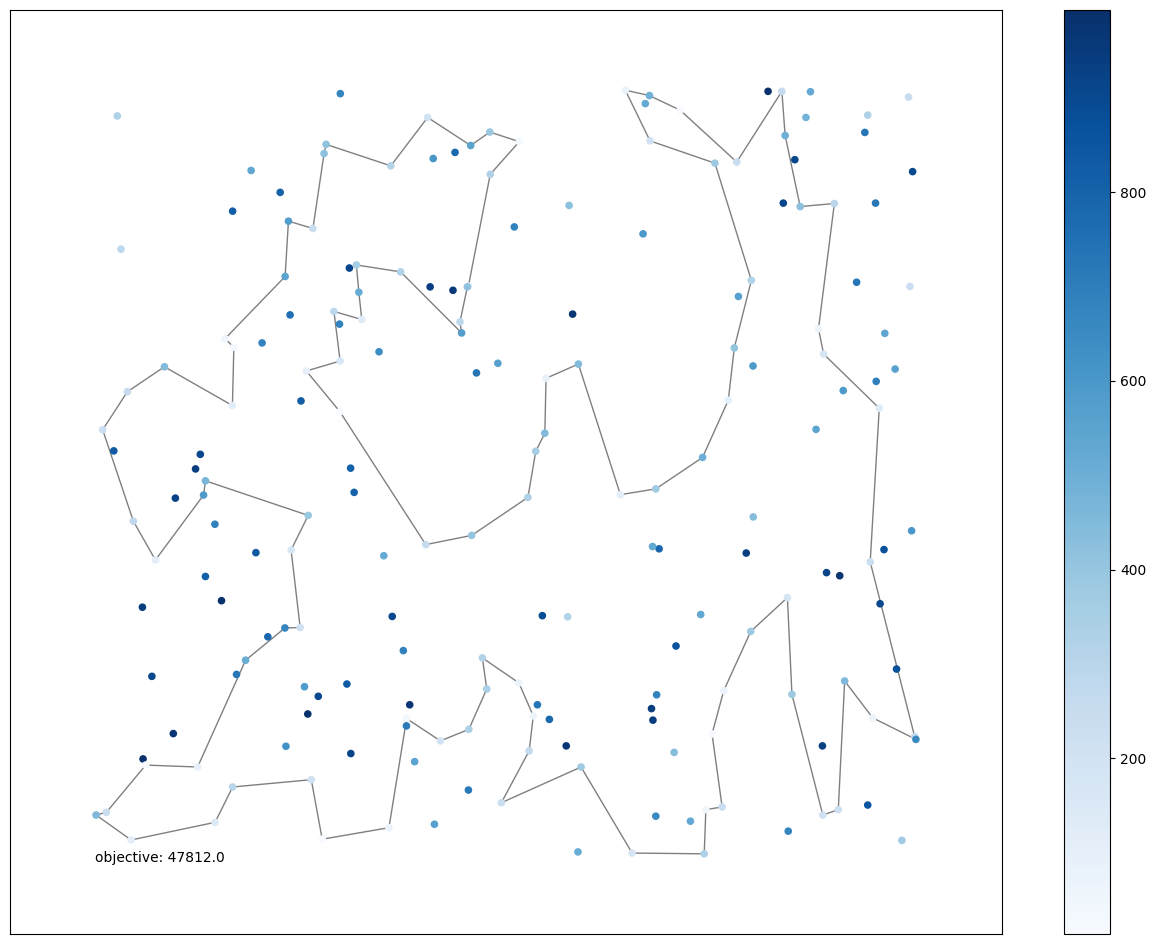

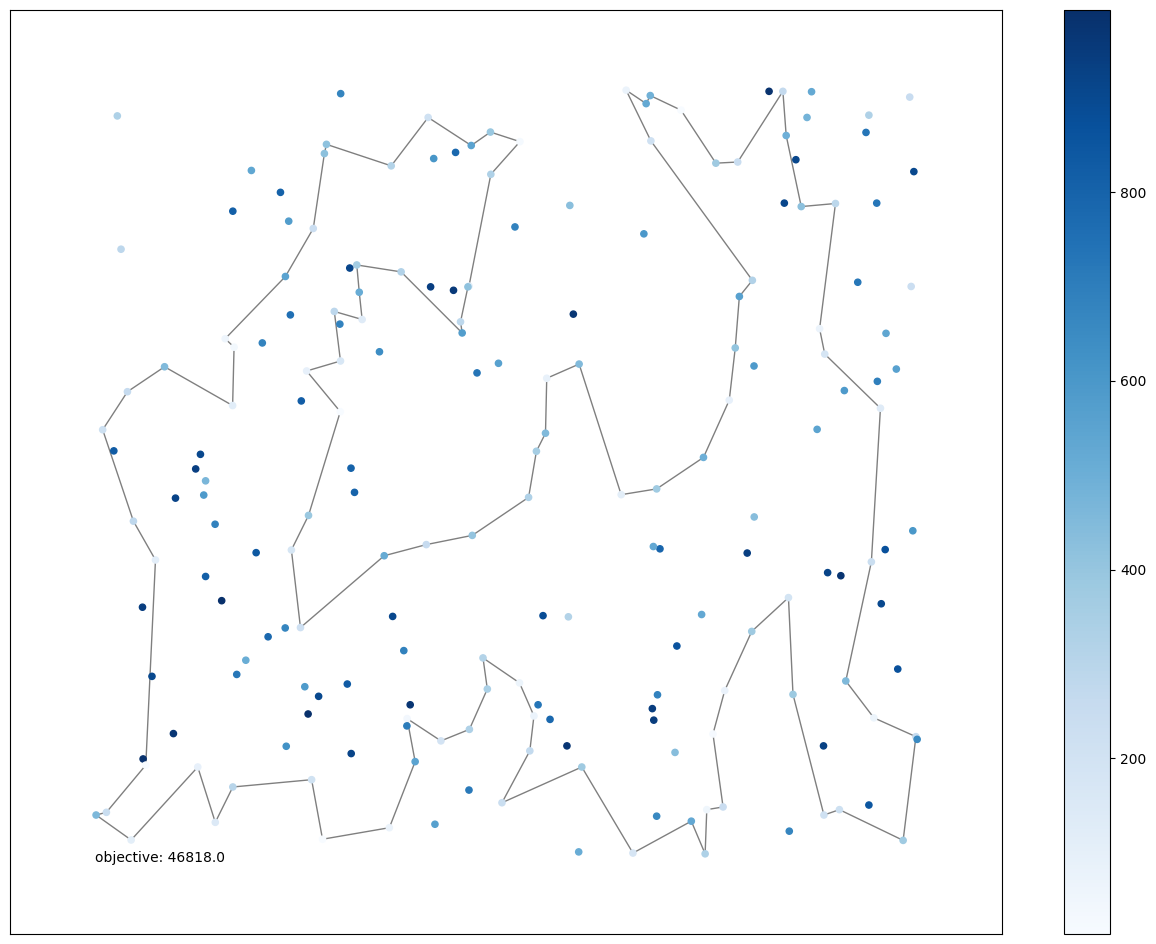

In [5]:
node_path_C = '../data/TSPC.csv'
experiments(node_path_C, max_time=530.4385324001312)

# Instance D

100%|██████████

Algorithm: ils_steepest:
    objective: 43350.5(43063 - 43635)
    times: 542.4154675483703(542.4154605865479 - 542.415474653244)
    iterations: 2186.1(2139 - 2230)
Algorithm: large_scale_neighbourhood_no_ls:
    objective: 46404.7(44982 - 48045)
    times: 542.4154584407806(542.4154541492462 - 542.415463924408)
    iterations: 253431.5(252472 - 254625)
Algorithm: large_scale_neighbourhood_ls:
    objective: 43816.7(43238 - 45078)
    times: 542.4154693126678(542.4154555797577 - 542.4154767990112)
    iterations: 2550.8(2387 - 2663)


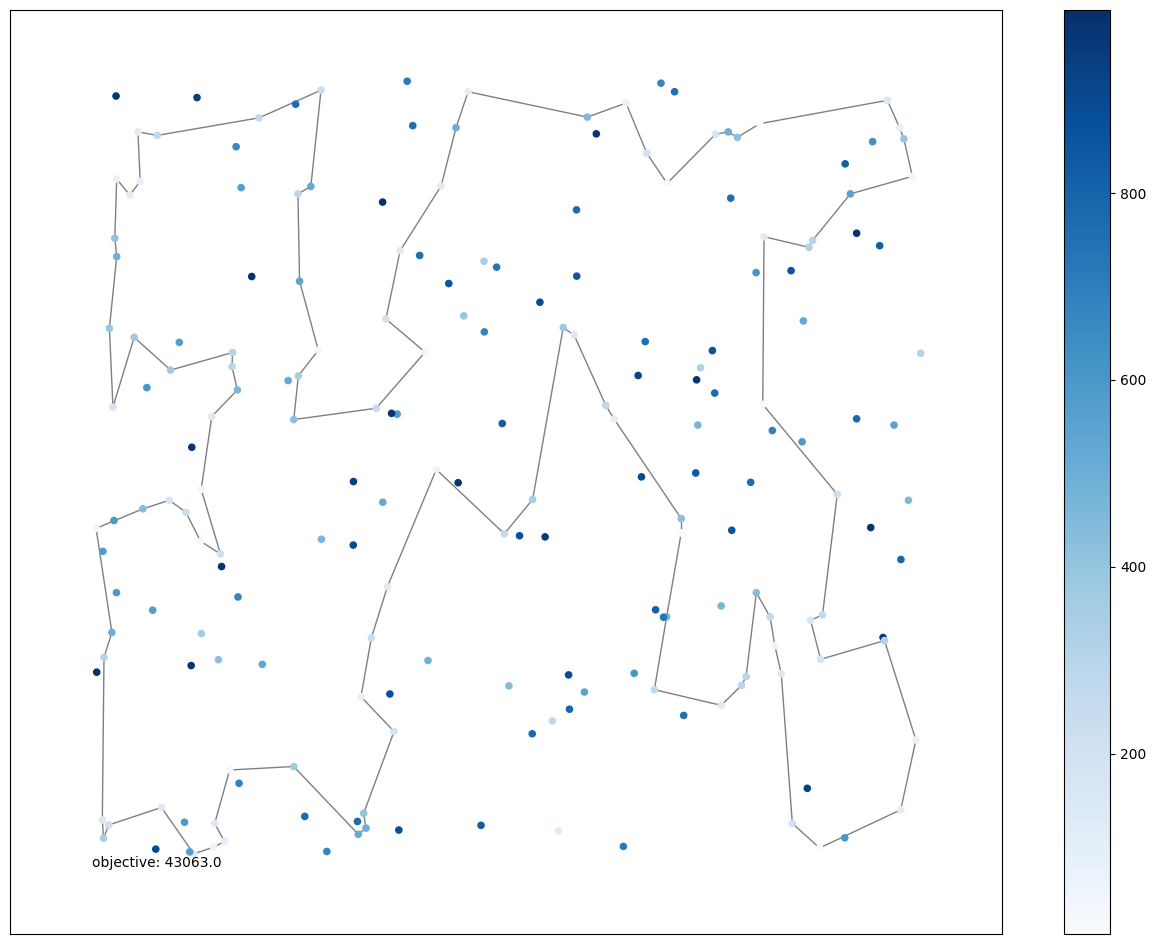

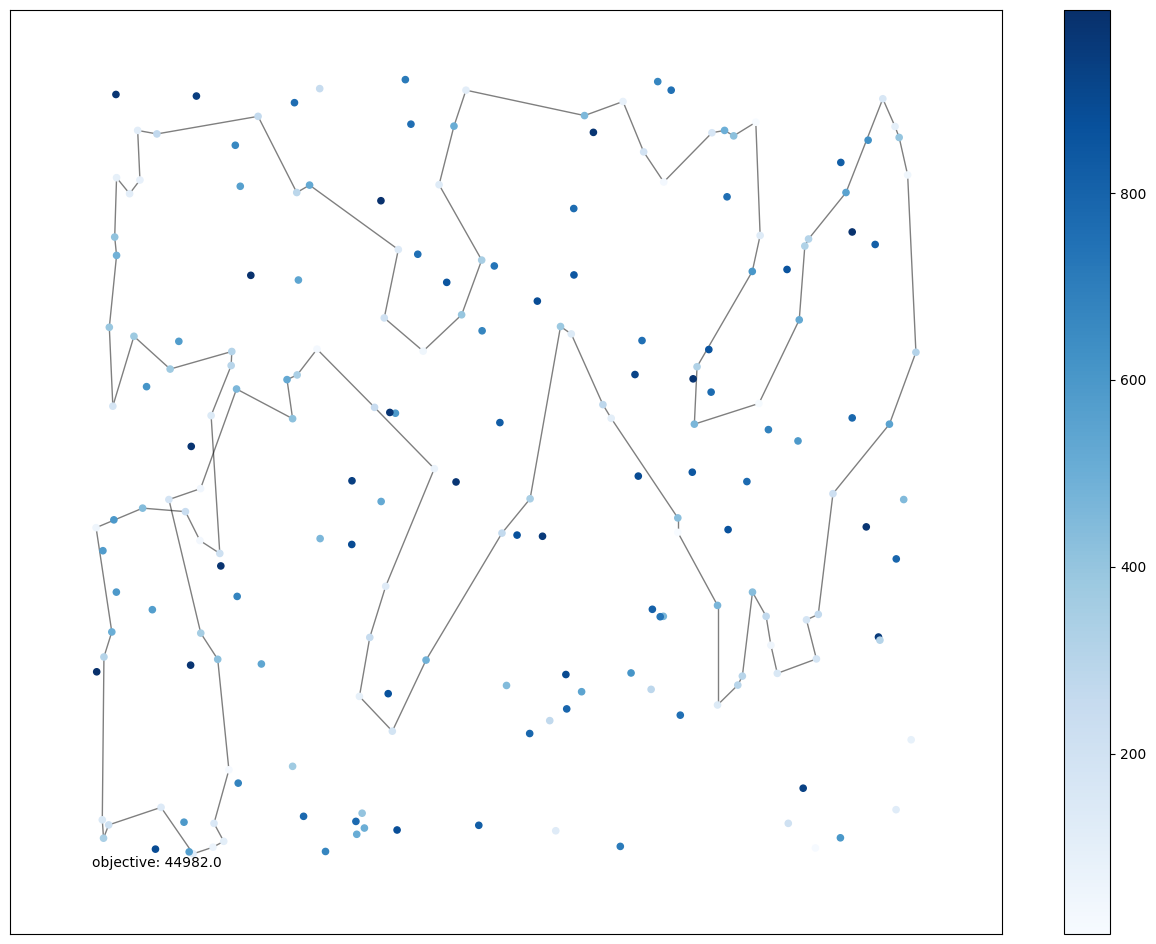

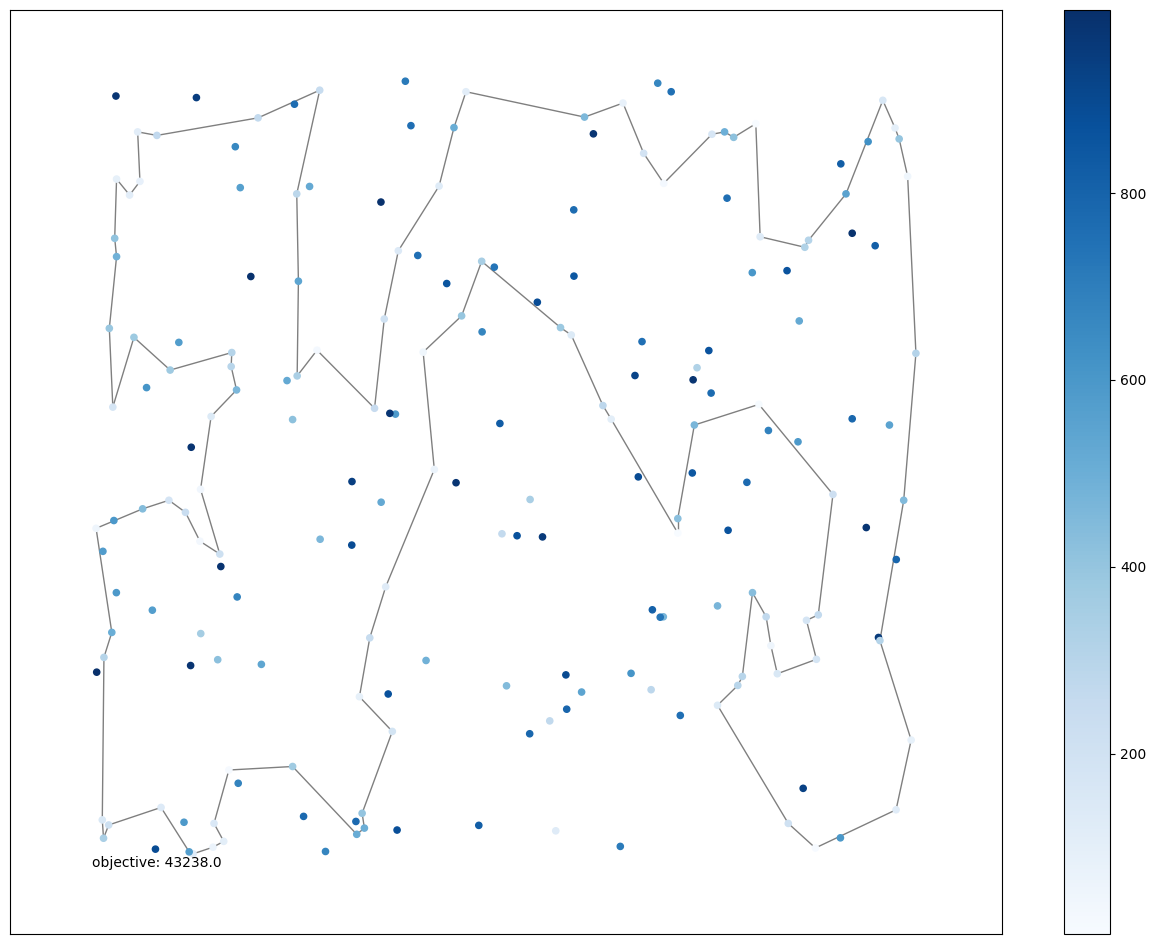

In [6]:
node_path_D = '../data/TSPD.csv'
experiments(node_path_D, max_time=542.4154284715653)